In [ ]:
conda create -n env_pytorch python=3.11.4

In [ ]:
conda activate env_pytorch

In [ ]:
pip install torchvision 

In [2]:
conda install pytorch

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sec\anaconda3

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libuv-1.44.2               |       h2bbff1b_0         288 KB
    ninja-1.10.2               |       haa95532_5          14 KB
    ninja-base-1.10.2          |       h6d14046_5         255 KB
    pytorch-2.2.0              |cpu_py311hd080823_0       112.1 MB
    typing-extensions-4.9.0    |  py311haa95532_1          10 KB
    typing_extensions-4.9.0    |  py311haa95532_1          70 KB
    ------------------------------------------------------------
                                           Total:       112.7 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/win-64::libuv-1.44.2-h2bbff1b_0 
  ninja              pkgs/main/win-64::ninja-1.10.2-haa95532_5 
  ninja

In [4]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
# call library

import tensorflow as tf

# Download dataset(tf.keras)

fashion_mnist = tf.keras.datasets.fashion_mnist






In [7]:
## Look at data

fashion_mnist.load_data()


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
# Data dension checking
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()
print(len(X_train), len(X_test))
print(X_train.shape, X_test.shape)


60000 10000
(60000, 28, 28) (10000, 28, 28)


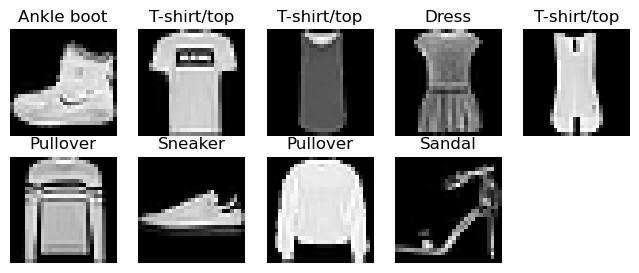

In [9]:
# 1 or 2 data shape checking
import matplotlib.pyplot as plt

class_name = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Display the 9 image with labels
plt.figure(figsize =(8,8))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(class_name[y_train[i]])
    plt.axis('off')
    
plt.show()

# Pre-processing

In [17]:
#Data normalization 
#Set up range 0 ~ 1
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

## Creating cnn

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model with convolutional layers
model = models.Sequential([
  # Convolutional layer with 32 filters, kernel size of 3, activation 'relu', and input shape as the first layer
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  # MaxPooling layer with pool size of 2
  layers.MaxPooling2D((2, 2)),
  # Second convolutional layer with 64 filters
  layers.Conv2D(64, (3, 3), activation='relu'),
  # Second MaxPooling layer with the same pool size
  layers.MaxPooling2D((2, 2)),
  # Third convolutional layer with 64 filters
  layers.Conv2D(64, (3, 3), activation='relu'),
  # Flatten the output of the last convolutional layer to feed it into dense layers
  layers.Flatten(),
  # Dense layer with 64 units and 'relu' activation
  layers.Dense(64, activation='relu'),
  # Output dense layer with 10 units for classification and 'softmax' activation
  layers.Dense(10, activation='softmax')
])

In [19]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
  X_train, y_train,          # Training data and labels
  epochs=20,                 # Train for 20 epochs, or try 10 or 15 as per recommendation
  validation_data=(X_test, y_test),  # Validation data to monitor the performance
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.7455 - loss: 0.6894 - val_accuracy: 0.8542 - val_loss: 0.3949
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.8787 - loss: 0.3299 - val_accuracy: 0.8809 - val_loss: 0.3219
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8949 - loss: 0.2823 - val_accuracy: 0.8982 - val_loss: 0.2809
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9067 - loss: 0.2510 - val_accuracy: 0.8947 - val_loss: 0.2911
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9185 - loss: 0.2192 - val_accuracy: 0.9098 - val_loss: 0.2531
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9270 - loss: 0.1958 - val_accuracy: 0.9016 - val_loss: 0.2702
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9338 - loss: 0.1806 - val_accuracy: 0.9088 - val_loss: 0.2637
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9375 -

In [21]:
history.history

{'accuracy': [0.819016695022583,
  0.8831999897956848,
  0.8979166746139526,
  0.9090499877929688,
  0.9191333055496216,
  0.9258833527565002,
  0.9323333501815796,
  0.9371333122253418,
  0.9426000118255615,
  0.9468833208084106,
  0.9513833522796631,
  0.9553333520889282,
  0.9573000073432922,
  0.9617666602134705,
  0.9632166624069214,
  0.967199981212616,
  0.9693833589553833,
  0.970300018787384,
  0.9721166491508484,
  0.974566638469696],
 'loss': [0.4916076064109802,
  0.3179199993610382,
  0.27418944239616394,
  0.24405132234096527,
  0.22066524624824524,
  0.201143279671669,
  0.18227234482765198,
  0.16715805232524872,
  0.15476851165294647,
  0.14062675833702087,
  0.12737959623336792,
  0.11913014203310013,
  0.11045989394187927,
  0.10049406439065933,
  0.09574206173419952,
  0.08644573390483856,
  0.08001580089330673,
  0.07716771960258484,
  0.0734531357884407,
  0.06628713011741638],
 'val_accuracy': [0.854200005531311,
  0.8809000253677368,
  0.8981999754905701,
  0.89

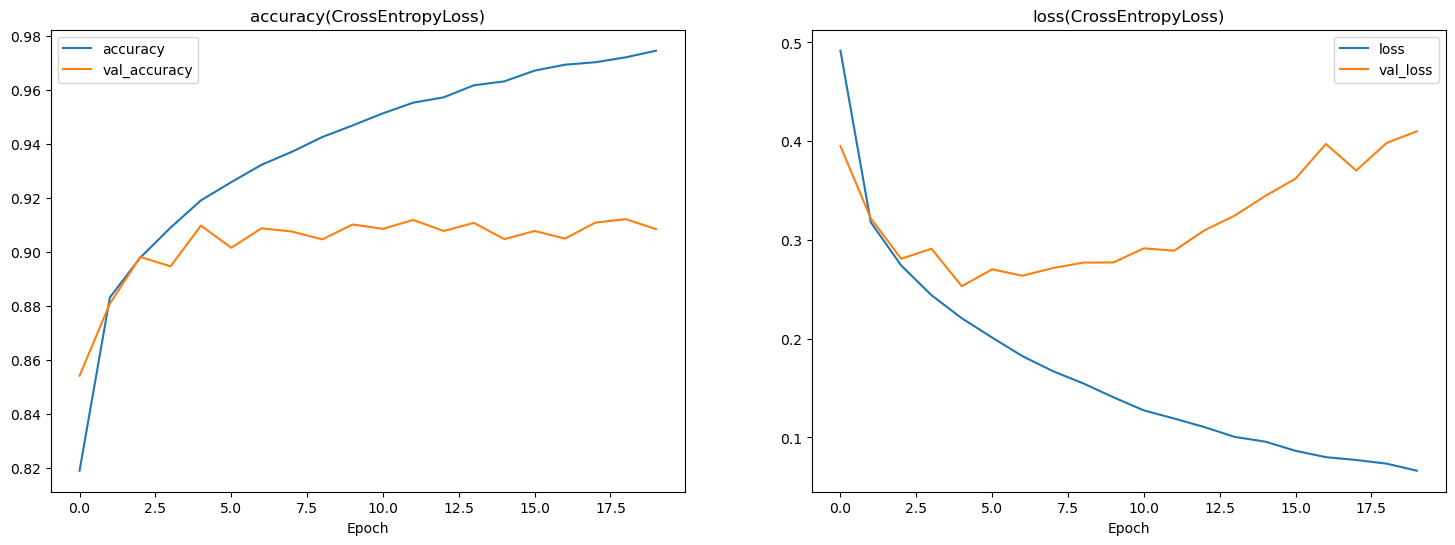

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9056 - loss: 0.4310
Accuracy:  0.9085000157356262
Loss 0.4099789559841156


In [25]:
#Model Evaluating
import matplotlib.pyplot as plt

#Learned Information visualization
plt.figure(figsize=(18,6))

#epoch accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy(CrossEntropyLoss)')
plt.xlabel('Epoch')
plt.legend()

#epoch loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss(CrossEntropyLoss)')
plt.xlabel('Epoch')
plt.legend()

plt.show()

loss, acc = model.evaluate(X_test, y_test)
print("Accuracy: ", acc)
print("Loss", loss)


# Experimental with different parameter

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

# Define a function to create the model with varying layers and neurons
def create_model(n_layers, n_neurons):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Assuming images are 28x28 pixels
    for _ in range(n_layers):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    return model

# Lists of hyperparameters to try
learning_rates = [0.1, 0.25, 0.30]
layer_options = [2, 3, 5]
neuron_options = [10, 20, 30]

# Iterate over all possible combinations of hyperparameters
for lr in learning_rates:
    for n_layers in layer_options:
        for n_neurons in neuron_options:
            print(f"Training model with lr={lr}, n_layers={n_layers}, n_neurons={n_neurons}")

            # Create a new instance of the model with the current combination of hyperparameters
            model = create_model(n_layers, n_neurons)

            # Compile the model with the current learning rate
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

            # Evaluate the model
            test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

            # Print out the test accuracy for the current combination
            print("Test Accuracy:", test_accuracy)



Training model with lr=0.1, n_layers=2, n_neurons=10
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2486 - loss: 1.9175 - val_accuracy: 0.3120 - val_loss: 1.4825
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2716 - loss: 1.8040 - val_accuracy: 0.3555 - val_loss: 1.4767
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.3392 - loss: 1.4597 - val_accuracy: 0.3395 - val_loss: 1.4428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3484 - loss: 1.4400 - val_accuracy: 0.3226 - val_loss: 1.4788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3430 - loss: 1.4465 - val_accuracy: 0.3268 - val_loss: 1.4707
313/313 - 1s - 2ms/step - accuracy: 0.3268 - loss: 1.4707
Test Accuracy: 0.32679998874664307
Training model with lr=0.1, n_layers=2, n_neurons=20
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2844 - loss: 1.8411 - val_accuracy: 0.2828 - val_loss: 1.6040
Epoch 2/5
1875/1875 ━━━━━━━

Test Accuracy: 0.10000000149011612
Training model with lr=0.25, n_layers=5, n_neurons=30
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0982 - loss: 12.7197 - val_accuracy: 0.1000 - val_loss: 2.3323
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1001 - loss: 2.3330 - val_accuracy: 0.1000 - val_loss: 2.3269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1010 - loss: 2.3343 - val_accuracy: 0.1000 - val_loss: 2.3177
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0997 - loss: 2.3326 - val_accuracy: 0.1000 - val_loss: 2.3239
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1022 - loss: 2.3336 - val_accuracy: 0.1000 - val_loss: 2.3152
313/313 - 1s - 2ms/step - accuracy: 0.1000 - loss: 2.3152
Test Accuracy: 0.10000000149011612
Training model with lr=0.3, n_layers=2, n_neurons=10
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0989 - loss: 2.6558 - val_accuracy: 0.1000 - val_los

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images by scaling them to a [0, 1] range
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# If you need to one-hot encode the labels (depending on your model's loss function)
test_labels = to_categorical(test_labels)

# If your model uses sparse categorical crossentropy and expects integer labels, you can skip one-hot encoding


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# call library

import tensorflow as tf

# Download dataset(tf.keras)

fashion_mnist = tf.keras.datasets.fashion_mnist




In [ ]:
# Data dension checking
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()
print(len(X_train), len(X_test))
print(X_train.shape, X_test.shape)

In [ ]:
#Data normalization 
#Set up range 0 ~ 1
X_train = X_train.astype('float32') / 255.0
y_train = y_train.astype('float32') / 255.0

print(X_train[0])

In [ ]:
x_val = X_train[:10000] / 255.0
X_train = X_train[10000:]/ 255.0

y_val = y_train[:10000]
y_train = y_train[10000:]

In [30]:
pip install numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
from sklearn.decomposition import PCA
#Reshape data from channel to row
X_train = np.reshape(X_train,(X_train.shape[0],-1))
x_val = np.reshape(x_val, (x_val.shape[0],-1))

pca = PCA(n_components = 100, random_state = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(x_val)

In [32]:
import pandas as pd

X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [33]:
# convert the continuous value to categrical value
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical value
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_val = lab.fit_transform(y_val)
#view transformed values

In [34]:
#Multinomial logstic Regression
import warnings
import time
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

start1 =time.time()
#apply_gridsearch at alst
multinomial = LogisticRegression(multi_class = 'multinomial',max_iter = 200, random_state = 42)
multinomial.fit(X_train_PCA1,y_train)

end1 = time.time()
multinomial_time = end1 - start1

print("Multinomail Logistic Time: {:0.2f} minute".format(multinomial_time/60.0))

Multinomail Logistic Time: 0.04 minute


# Predicting Model

In [35]:
from sklearn import metrics

y_train_multinomial = multinomial.predict(X_train_PCA1)
y_pred_multinomial = multinomial.predict(X_test_pca)
multinomial_train = metrics.accuracy_score(y_train,y_train_multinomial)
multinomial_accuracy = metrics.accuracy_score(y_val,y_pred_multinomial)

print("Train Accuracy Score: {}".format(multinomial_train))
print("Test Accuracy Score: {}".format(multinomial_accuracy))
print(metrics.classification_report(y_val,y_pred_multinomial))

Train Accuracy Score: 0.70138
Test Accuracy Score: 0.7018
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       942
           1       0.91      0.93      0.92      1027
           2       0.60      0.56      0.58      1016
           3       0.74      0.81      0.77      1019
           4       0.55      0.64      0.59       974
           5       0.50      0.72      0.59       989
           6       0.51      0.09      0.15      1021
           7       0.74      0.83      0.78      1022
           8       0.91      0.80      0.86       990
           9       0.83      0.91      0.87      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.68     10000
weighted avg       0.70      0.70      0.68     10000



# confusion matrix

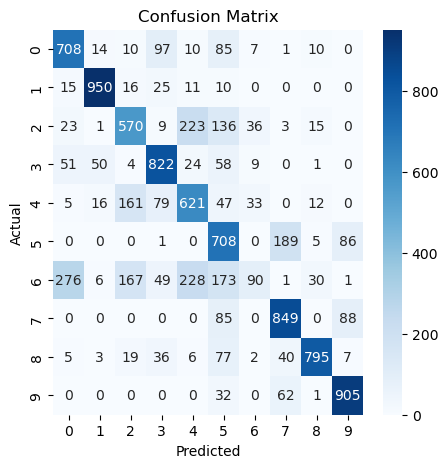

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

con_matrix = pd.crosstab(pd.Series(y_val.flatten(), name = 'Actual'), pd.Series(y_pred_multinomial, name = 'Predicted'))
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix')
sns.heatmap(con_matrix, cmap ="Blues", annot = True, fmt ='g')
plt.show()

# Second Model Creating

In [71]:
# call library

import tensorflow as tf

# Download dataset(tf.keras)

fashion_mnist = tf.keras.datasets.fashion_mnist






In [72]:
# Data dension checking
(X_train2,y_train2), (X_test2, y_test2) = fashion_mnist.load_data()
print(len(X_train2), len(X_test2))
print(X_train.shape, X_test.shape)


60000 10000
(60000, 28, 28) (10000, 28, 28)


In [74]:
X_train2 = X_train2 / 255.0
X_test2 = X_test2 / 255.0
print(X_train2[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [75]:
# #Data normalization 
# #Set up range 0 ~ 1
# X_train = X_train.astype('float32') / 255.0
# y_train = y_train.astype('float32') / 255.0
# X_test = X_test/255


In [76]:
# x_val = X_train[:10000] / 255.0
# X_train = X_train[10000:]/ 255.0

# y_val = y_train[:10000]
# y_train = y_train[10000:]

In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model with convolutional layers
model2 = models.Sequential([
  # Convolutional layer with 32 filters, kernel size of 3, activation 'relu', and input shape as the first layer
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  # MaxPooling layer with pool size of 2
  layers.MaxPooling2D((2, 2)),
  # Second convolutional layer with 64 filters
  layers.Conv2D(64, (3, 3), activation='relu'),
  # Second MaxPooling layer with the same pool size
  layers.MaxPooling2D((2, 2)),
  # Third convolutional layer with 64 filters
  layers.Conv2D(64, (3, 3), activation='relu'),
  # Flatten the output of the last convolutional layer to feed it into dense layers
  layers.Flatten(),
  # Dense layer with 64 units and 'relu' activation
  layers.Dense(64, activation='relu'),
  # Output dense layer with 10 units for classification and 'softmax' activation
  layers.Dense(10, activation='softmax')
])



In [78]:
model2.compile(optimizer='adam', 
              loss=tf.keras.losses.KLDivergence(),
              metrics=['accuracy'])


In [79]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history2 = model2.fit(
  X_train2, y_train2,          # Training data and labels
  epochs=10,                 # Train for 20 epochs, or try 10 or 15 as per recommendation
  validation_data=(X_test2, y_test2),  # Validation data to monitor the performance
)

Epoch 1/10


ValueError: Dimensions must be equal, but are 32 and 10 for '{{node compile_loss/kl_divergence/truediv}} = RealDiv[T=DT_FLOAT](compile_loss/kl_divergence/clip_by_value, compile_loss/kl_divergence/clip_by_value_1)' with input shapes: [32], [32,10].

# Data Argumentation Technique

In [81]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [85]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [88]:
import tensorflow as tf
# Reshape data for convolution network
new_x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
new_x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
new_input_shape = (28, 28, 1)

# Convert from 'uint8' to 'float32' and normalise the data to (0,1)
new_x_train_conv = new_x_train_conv.astype("float32") / 255
new_x_test_conv = new_x_test_conv.astype("float32") / 255

# convert class vectors to binary class matrices
new_y_train_class = tf.keras.utils.to_categorical(y_train, 10)
new_y_test_class = tf.keras.utils.to_categorical(y_test, 10)


In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [91]:
# This will do preprocessing and realtime data augmentation
augmented_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [92]:
# Set up the generator
augmented_datagen.fit(new_x_train_conv)

In [93]:
new_x_train_conv[:1].shape

(1, 28, 28, 1)

In [94]:
augmented_datagen.fit(new_x_train_conv[:1])

In [95]:
samples = augmented_datagen.flow(new_x_train_conv[:1])

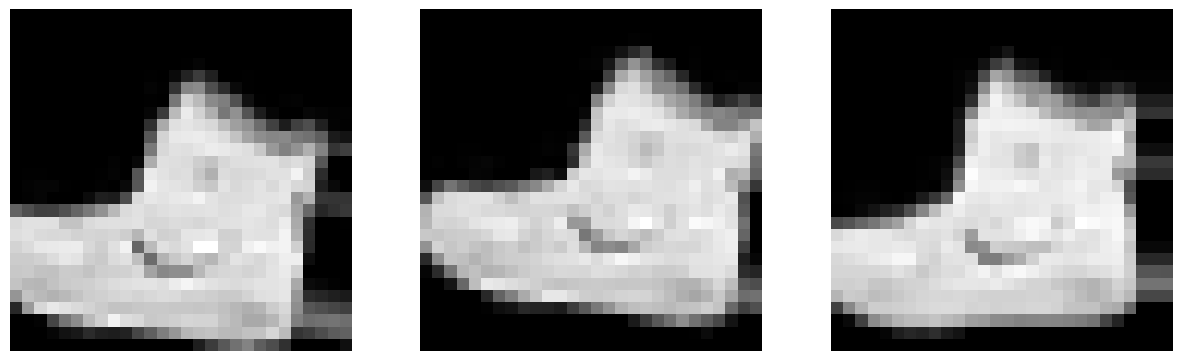

In [101]:
import matplotlib.pyplot as plt

# Assuming 'samples' is an iterable that provides image samples.
# You would need to replace 'samples' with your actual data source.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Set up a figure with 1 row and 3 columns

# Loop through the first three samples
for i in range(3):
    img = next(samples)  # Replace with how you get your sample, e.g., x_train_conv[i]
    img = img.squeeze()  # Remove the channel dimension if it's 1 to display grayscale

    # Display each image in a subplot
    axes[i].imshow(img, cmap='gray', interpolation='nearest')
    axes[i].axis('off')  # Hide the axes

plt.show()

